# Classification-Based Linear Surrogate Modeling of Constraints for AL-CMA-ES

<!-- **TODO**
- Remove `Dufosse2021` and replace with a custom ellipsoid function
- Remove `find_feasible_x0`
- Add `ConstraintsWrapper` to constraints in `BinaryConstraintOptimizationAL`
- Change names of `BinaryConstraintOptimizationAL` and `SurrogateHandler` -->

## Usage

In [27]:
import numpy as np
import cma

from src.alls_cma_es import optimize
from src.problems import Dufosse2021

dim = 10
x0 = [-1]*(dim)
sigma0 = 1
f, constraint = Dufosse2021(dim, m=1, condition_number=1e6).get()

# ALLS-CMA-ES options
surrogate_opts = {
    "max_iters_interval_halving": 6
}

# CMA-ES options
cma_opts={
    'tolstagnation': np.inf,
    'termination_callback': lambda es: np.linalg.norm(es.mean) <= 1e-5
}

es, cfun = optimize(
    f,
    constraint,
    x0,
    sigma0,
    surrogate_opts,
    cma_opts,
    logging=True
)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=246443, Wed May 14 13:24:47 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 2.586160104827762e+06 1.2e+00 9.55e-01  9e-01  1e+00 0:00.0
    2     20 3.888362147804557e+05 1.3e+00 9.39e-01  9e-01  1e+00 0:00.0
    3     30 3.911326955103715e+05 1.3e+00 9.50e-01  9e-01  1e+00 0:00.0
  100   1000 9.228841725070140e+05 2.9e+01 2.68e-01  3e-02  5e-01 0:00.3
  200   2000 1.000112394001130e+06 1.4e+02 9.37e-02  2e-03  2e-01 0:00.5
  300   3000 1.000000865976860e+06 6.6e+02 1.02e-02  5e-05  3e-02 0:00.8
  400   4000 1.000000000038782e+06 1.3e+03 8.12e-04  2e-06  2e-03 0:01.0
  460   4600 1.000000000000007e+06 1.3e+03 2.08e-05  3e-08  3e-05 0:01.2
termination on callback=[True]
final/bestever f-value = 1.000000e+06 4.607635e+04 after 4600/107 evaluations
incumbent solution: [-3.29210364e-09 -3.30399635e-08  2.12438851e-07 -4.36130617e-08
 -1.00630323e-08 -3.92224883e-07 -3.68684417e-06 -1.631408

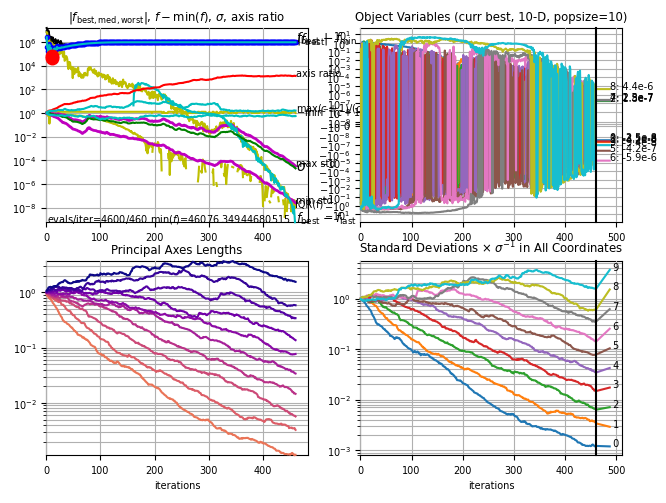

In [28]:
cma.plot(xsemilog=True)